<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/Brain_Scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

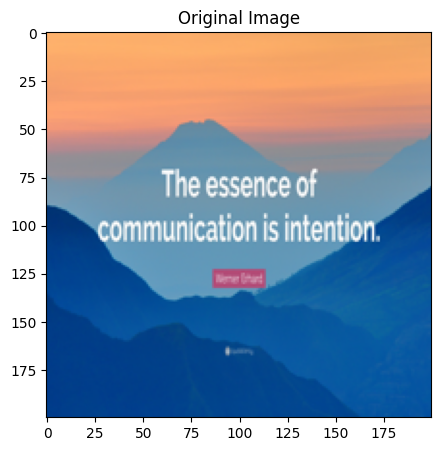

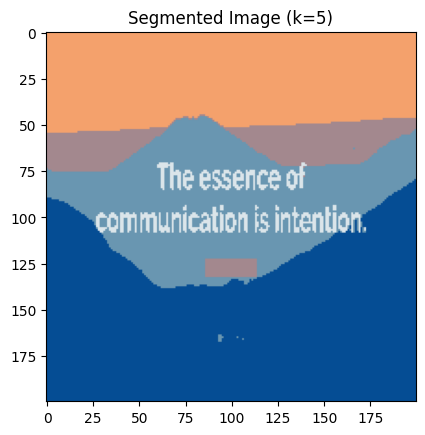

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

# Image path and number of clusters
image_path = "my_image.jpg"  # Replace with your image path
k = 5  # Number of clusters

# Load and resize the image
img = Image.open(image_path)
img = img.resize((200, 200))
img_array = np.array(img)

# Display the original image
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title("Original Image")
plt.show()


# Reshape the image array for K-means
h, w, c = img_array.shape
pixels = img_array.reshape(h * w, c)

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)

# Create the segmented image
segmented_image = kmeans.cluster_centers_[labels].reshape(h, w, c).astype(np.uint8)

# Display the segmented image
# plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (k={k})")
plt.show()

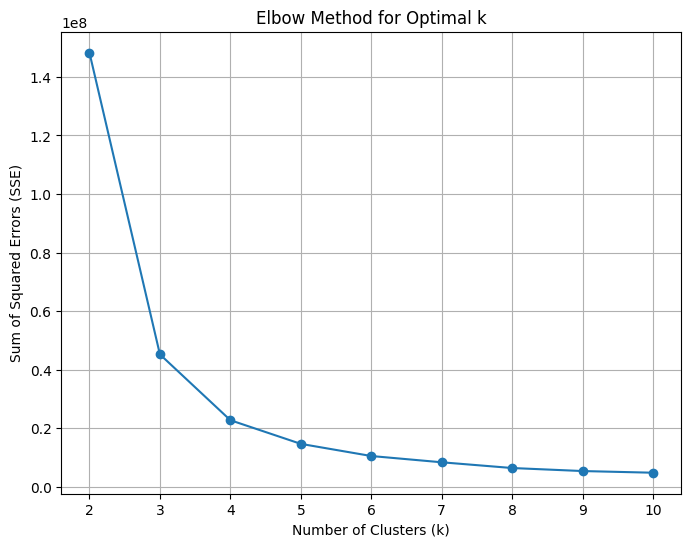

In [ ]:
# Elbow Method
sse = []  # Sum of Squared Errors
K = range(2, 11)  # Range of k values to try (at least 2 for Silhouette)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)  # Set x-axis ticks to integer values
plt.grid(True)
plt.show()

In [ ]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.7 MB/s eta 0:00:00


(-0.5, 511.5, 511.5, -0.5)

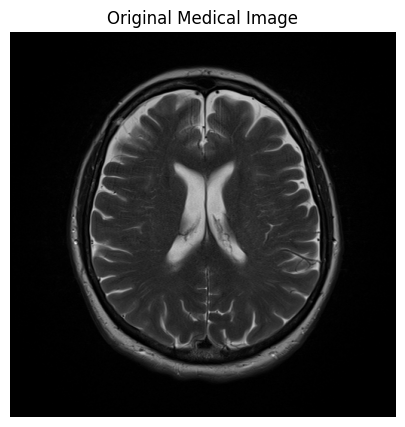

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pydicom

# DICOM file path
dicom_path = "/content/Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335 (1).dcm"  # Replace with your DICOM path

# Read DICOM image
dataset = pydicom.dcmread(dicom_path)
img_array = dataset.pixel_array.astype(float)

# # Normalize pixel values
img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
# # Display original image
plt.figure(figsize=(10, 5))
plt.imshow(img_array, cmap=plt.cm.gray)
plt.title("Original Medical Image")
plt.axis('off')

In [ ]:
dataset

In [ ]:
# Reshape for K-means
h, w = img_array.shape
pixels = img_array.reshape(h * w, 1)

# K-means clustering (example: k=3)
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)


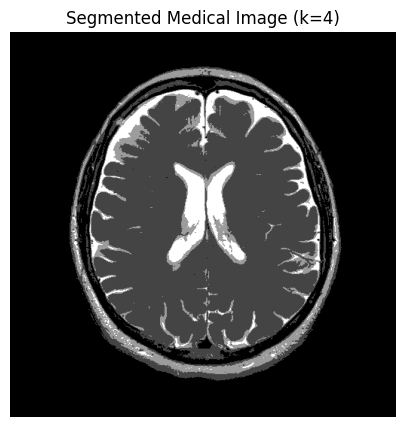

In [ ]:
# Create segmented image
segmented_image = kmeans.cluster_centers_[labels].reshape(h, w)

# # Display original image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(img_array, cmap=plt.cm.gray)
# plt.title("Original Medical Image")
# plt.axis('off')

# Display segmented image
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image, cmap=plt.cm.gray)
plt.title(f"Segmented Medical Image (k={k})")
plt.axis('off')
plt.show()


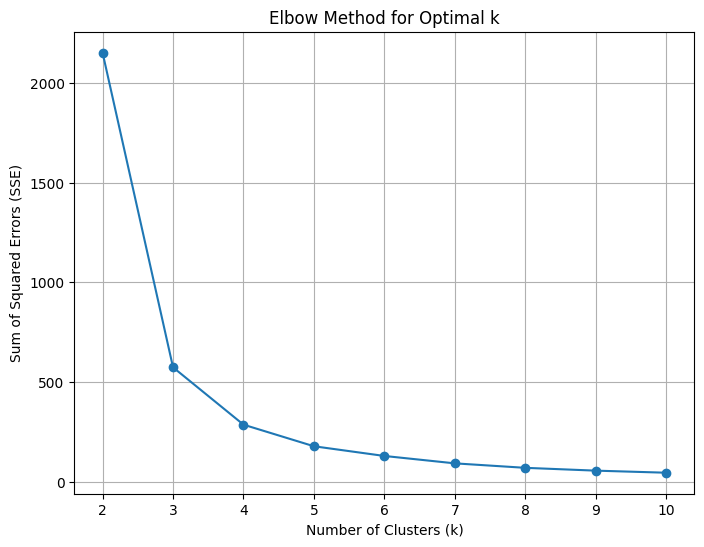

In [ ]:
# Elbow Method
sse = []
K = range(2, 11)  # Test k values from 2 to 10

for k_elbow in K:  # Use a different variable name for k in the loop
    kmeans_elbow = KMeans(n_clusters=k_elbow, random_state=42, n_init=10)
    kmeans_elbow.fit(pixels)
    sse.append(kmeans_elbow.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


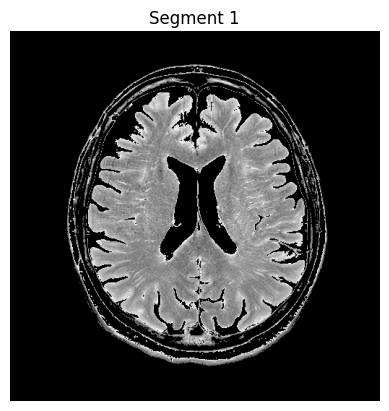

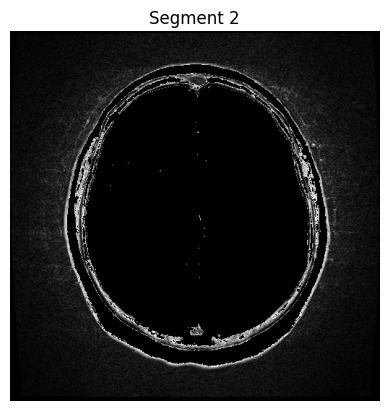

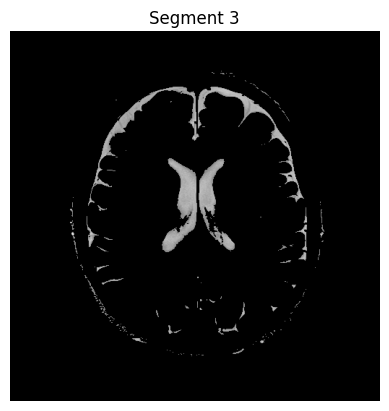

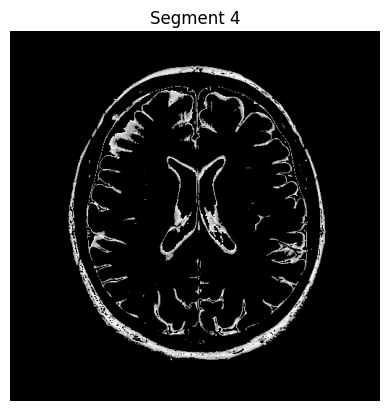

In [ ]:
for i in range(k):
    cluster_mask = (labels.reshape(h, w) == i)
    segment = img_array * cluster_mask

    plt.figure()  # New figure for each segment
    plt.imshow(segment, cmap=plt.cm.gray)
    plt.title(f"Segment {i+1}")
    plt.axis('off')
    plt.show()